In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import linear_model
import emcee
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.5)

/Users/james/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
file = 'nfl_data.csv'

df = pd.read_csv(file)
df

,Team,Compensation,Coach Name,Age,W2015,L2015,PCT2015,W2014,L2014,PCT2014,W2013,L2013,PCT2013
0,Arizona Cardinals,5000000,Bruce Arians,63,13,3,0.813,11,5,0.688,10,6,0.625
1,Atlanta Falcons,4500000,Dan Quinn,45,8,8,0.500,6,10,0.375,4,12,0.250
2,Baltimore Ravens,7000000,John Harbaugh,53,5,11,0.313,10,6,0.625,8,8,0.500
3,Buffalo Bills,4250000,Rex Ryan,53,8,8,0.500,9,7,0.563,6,10,0.375
4,Carolina Panthers,4000000,Ron Rivera,53,15,1,0.938,7,8,0.469,12,4,0.750
5,Chicago Bears,4250000,John Fox,60,6,10,0.375,5,11,0.313,8,8,0.500
6,Cincinnati Bengals,4500000,Marvin Lewis,57,12,4,0.750,10,5,0.656,11,5,0.688
7,Cleveland Browns,3500000,Mike Pettine,49,3,13,0.188,7,9,0.438,4,12,0.250
8,Dallas Cowboys,5000000,Jason Garrett,49,4,12,0.250,12,4,0.750,8,8,0.500
9,Denver Broncos,5000000,Gary Kubiak,54,12,4,0.750,12,4,0.750,13,3,0.813


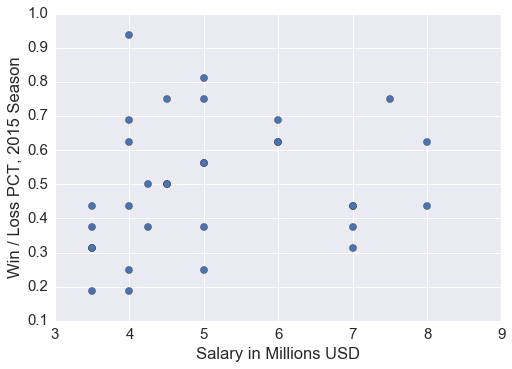

In [3]:
sns.set_color_codes()
plt.scatter(df['Compensation']/1e6, df['PCT2015'], s=50)
plt.xlabel('Salary in Millions USD')
plt.ylabel('Win / Loss PCT, 2015 Season')

In [4]:
# average the win/loss record for 2013 -- 2015
pct3yr = (df['W2015'] + df['W2014'] + df['W2013']) / (df['W2015'] + df['W2014'] + df['W2013'] + 
                                                      df['L2015'] + df['L2014'] + df['L2013'])

In [5]:
xx = np.array(df['Compensation'].values/1e6)
xx = xx.reshape(-1,1)
yy = np.array(pct3yr.values)

# fit a simple least-sqaures linear model
regr = linear_model.LinearRegression()
regr.fit(xx, yy)
model1 = regr.predict(xx)

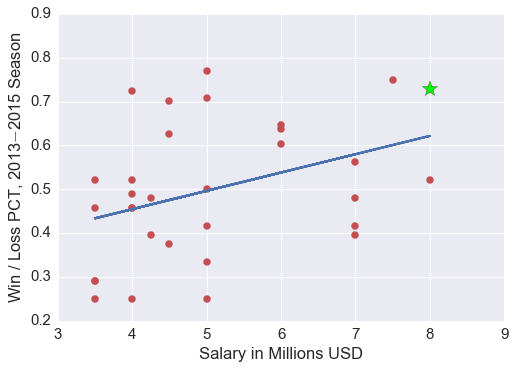

In [12]:
plt.scatter(df['Compensation']/1e6, pct3yr, s=50, color='r')
plt.xlabel('Salary in Millions USD')
plt.ylabel('Win / Loss PCT, 2013$-$2015 Season')
plt.plot(df['Compensation']/1e6, model1, linewidth=2)

# highlight the Seahawks!
sh = np.where((df['Team'] == 'Seattle Seahawks'))
plt.scatter(df['Compensation'].values[sh[0]]/1e6, pct3yr[sh[0]],marker='*',s=250, c='lime')

## print text labels for each team
# for k in range(0,len(pct3yr)):
#     plt.text(df['Compensation'].values[k]/1e6, pct3yr[k], df['Team'].values[k], alpha=0.5, rotation=10)

plt.savefig('fig1.png',dpi=300)

In [13]:
# now subtract the fit and calculate who has the best "value"
cvalue = pct3yr - model1

ss = np.argsort(cvalue)
print(df['Team'][ss[::-1]])

9           Denver Broncos
4        Carolina Panthers
6       Cincinnati Bengals
0        Arizona Cardinals
13      Indianapolis Colts
18    New England Patriots
15      Kansas City Chiefs
27        Seattle Seahawks
11       Green Bay Packers
26     San Francisco 49ers
10           Detroit Lions
24     Pittsburgh Steelers
17       Minnesota Vikings
16          Miami Dolphins
3            Buffalo Bills
21           New York Jets
25      San Diego Chargers
8           Dallas Cowboys
23     Philadelphia Eagles
5            Chicago Bears
12          Houston Texans
1          Atlanta Falcons
2         Baltimore Ravens
19      New Orleans Saints
7         Cleveland Browns
22         Oakland Raiders
31     Washington Redskins
28          St. Louis Rams
14    Jacksonville Jaguars
20         New York Giants
30        Tennessee Titans
29    Tampa Bay Buccaneers
Name: Team, dtype: object


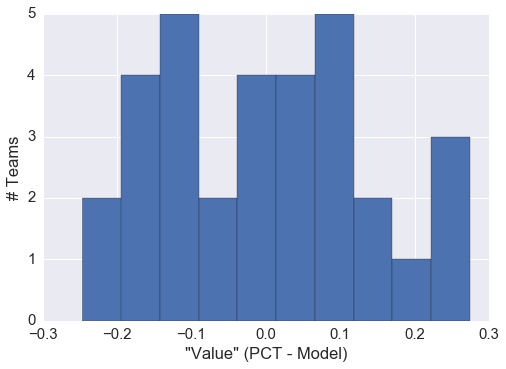

In [14]:
_ = plt.hist(cvalue)
plt.xlabel('"Value" (PCT - Model)')
plt.ylabel('# Teams')
plt.savefig('fig2.png',dpi=200)

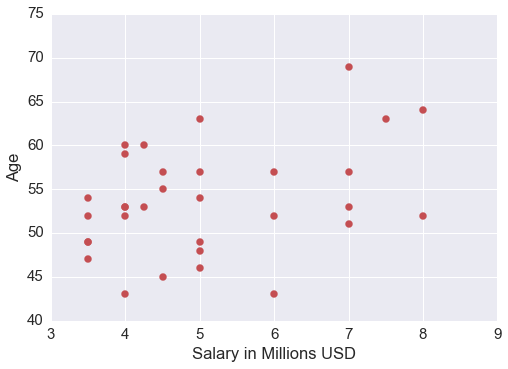

In [17]:
plt.scatter(df['Compensation']/1e6, df['Age'], s=50, color='r')
plt.xlabel('Salary in Millions USD')
plt.ylabel('Age')
